Current working directory: /content
Dataset loaded successfully.
Loaded DataFrame shape: (18875, 15)
Columns in DataFrame: ['cat__Type of Travel_Personal Travel', 'cat__Class_Eco', 'remainder__id', 'remainder__Flight Distance', 'remainder__Inflight wifi service', 'remainder__Ease of Online booking', 'remainder__Online boarding', 'remainder__Seat comfort', 'remainder__Inflight entertainment', 'remainder__On-board service', 'remainder__Leg room service', 'remainder__Inflight service', 'remainder__Cleanliness', 'remainder__satisfaction_encoded', 'Comfort_Per_Mile']
Target variable 'remainder__satisfaction_encoded' separated.
Target saved as: /content/target.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Feature DataFrame shape: (18875, 14)
Feature columns: ['cat__Type of Travel_Personal Travel', 'cat__Class_Eco', 'remainder__id', 'remainder__Flight Distance', 'remainder__Inflight wifi service', 'remainder__Ease of Online booking', 'remainder__Online boarding', 'remainder__Seat comfort', 'remainder__Inflight entertainment', 'remainder__On-board service', 'remainder__Leg room service', 'remainder__Inflight service', 'remainder__Cleanliness', 'Comfort_Per_Mile']

Summary Statistics of Selected Features:
       cat__Type of Travel_Personal Travel  cat__Class_Eco  remainder__id  \
count                         18875.000000    18875.000000   18875.000000   
mean                              0.315126        0.449748   65262.990834   
std                               0.464578        0.497482   37290.435436   
min                               0.000000        0.000000      17.000000   
25%                               0.000000        0.000000   32855.500000   
50%                            

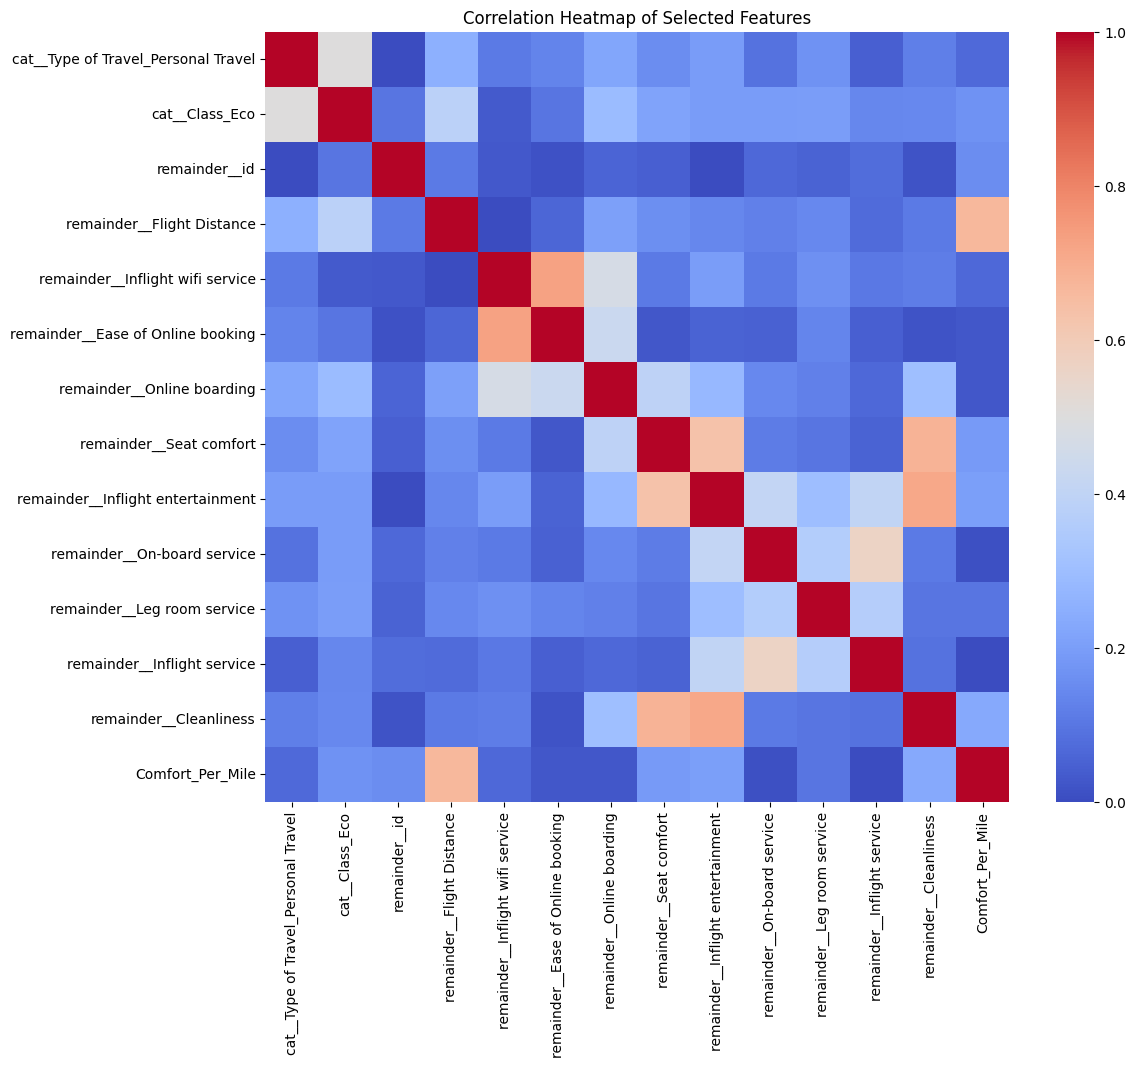

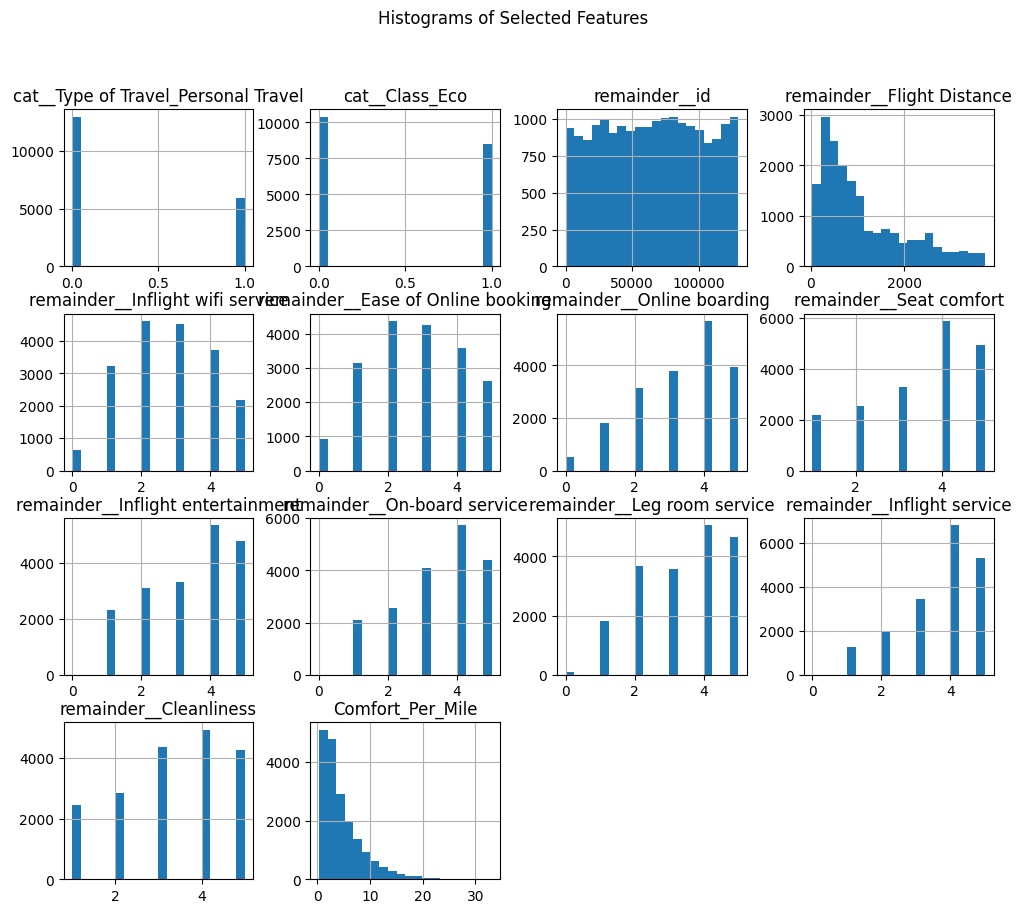

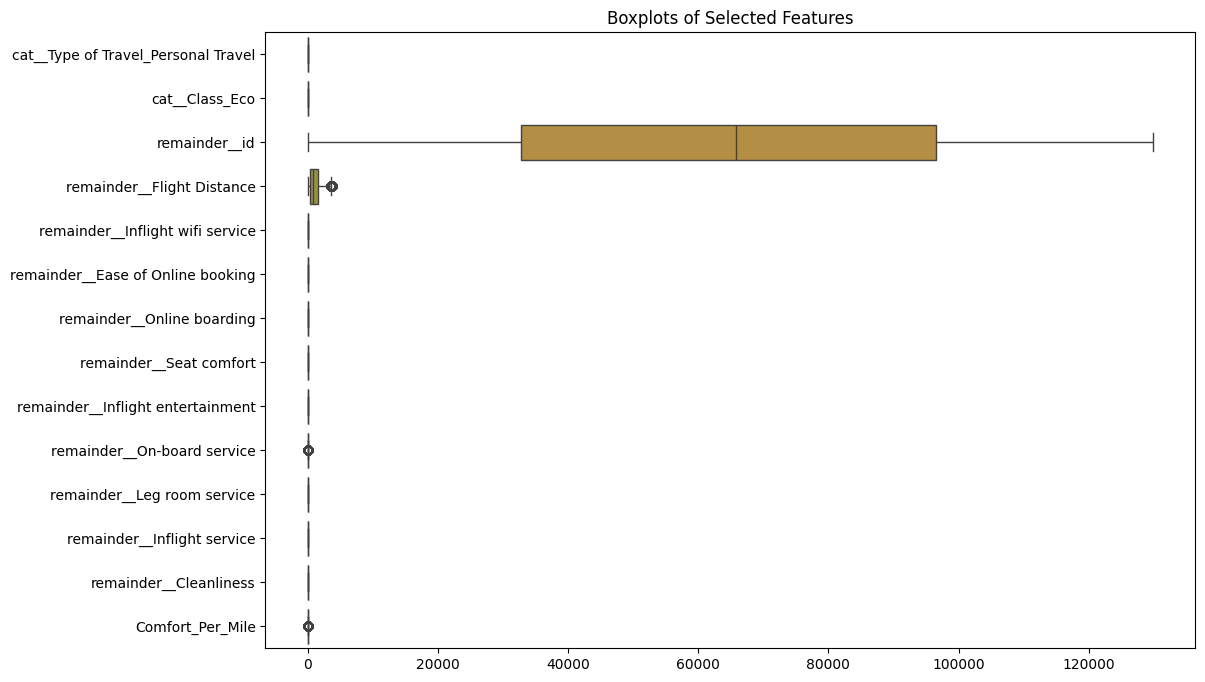

Scaling applied successfully.

Summary Statistics After Scaling:
       cat__Type of Travel_Personal Travel  cat__Class_Eco  remainder__id  \
count                         1.887500e+04    1.887500e+04   1.887500e+04   
mean                         -3.322140e-17   -1.293094e-16   2.409257e-17   
std                           1.000026e+00    1.000026e+00   1.000026e+00   
min                          -6.783231e-01   -9.040743e-01  -1.749717e+00   
25%                          -6.783231e-01   -9.040743e-01  -8.690794e-01   
50%                          -6.783231e-01   -9.040743e-01   1.426702e-02   
75%                           1.474224e+00    1.106104e+00   8.395139e-01   
max                           1.474224e+00    1.106104e+00   1.732769e+00   

       remainder__Flight Distance  remainder__Inflight wifi service  \
count                1.887500e+04                      1.887500e+04   
mean                 1.069108e-16                     -1.106753e-16   
std                  1.00002

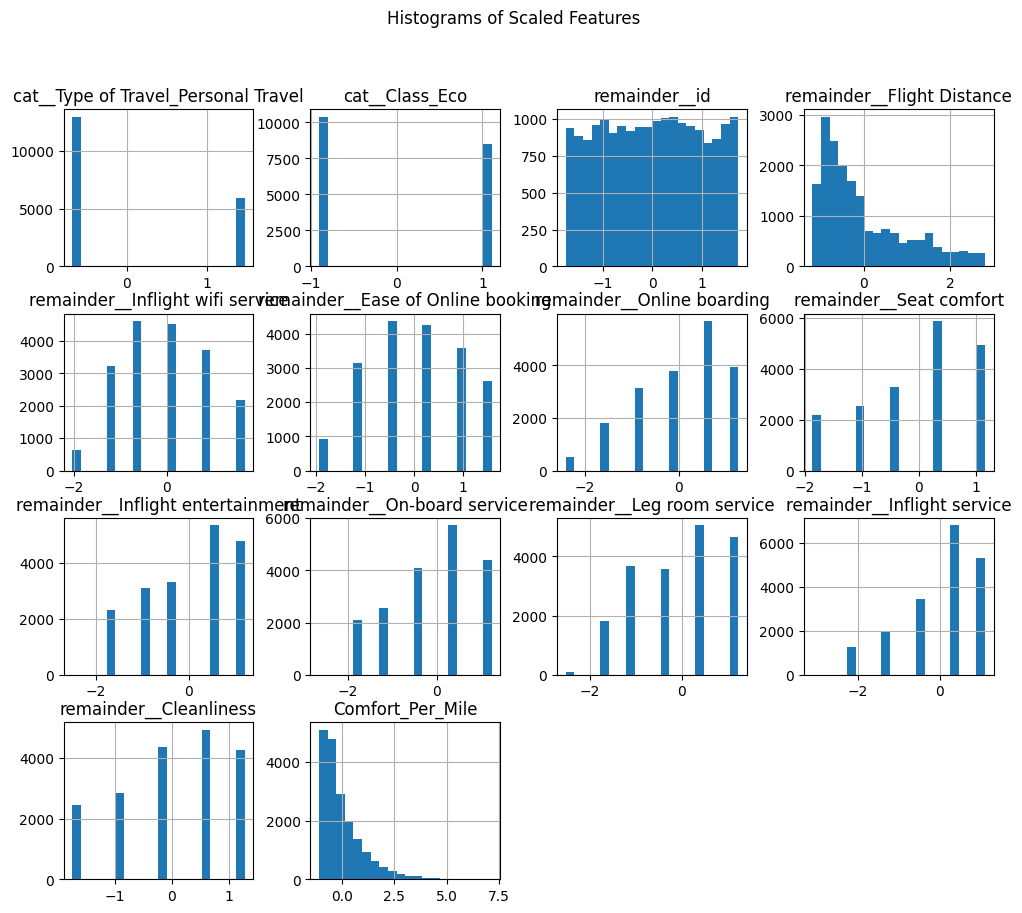

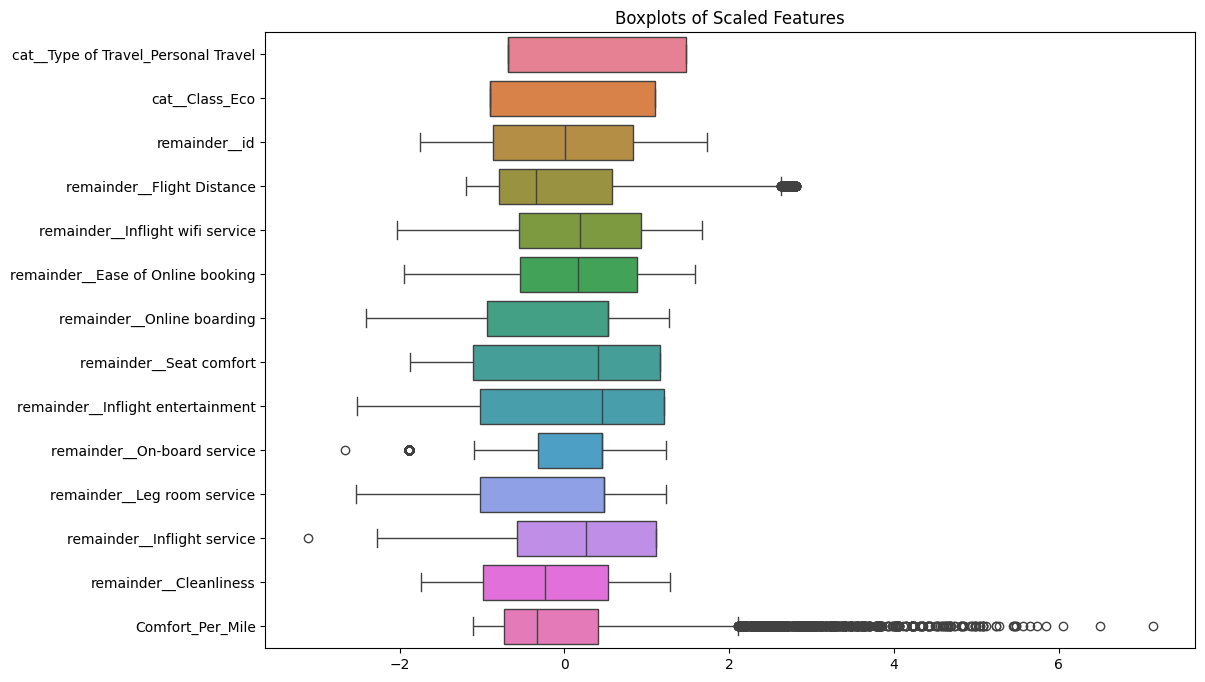

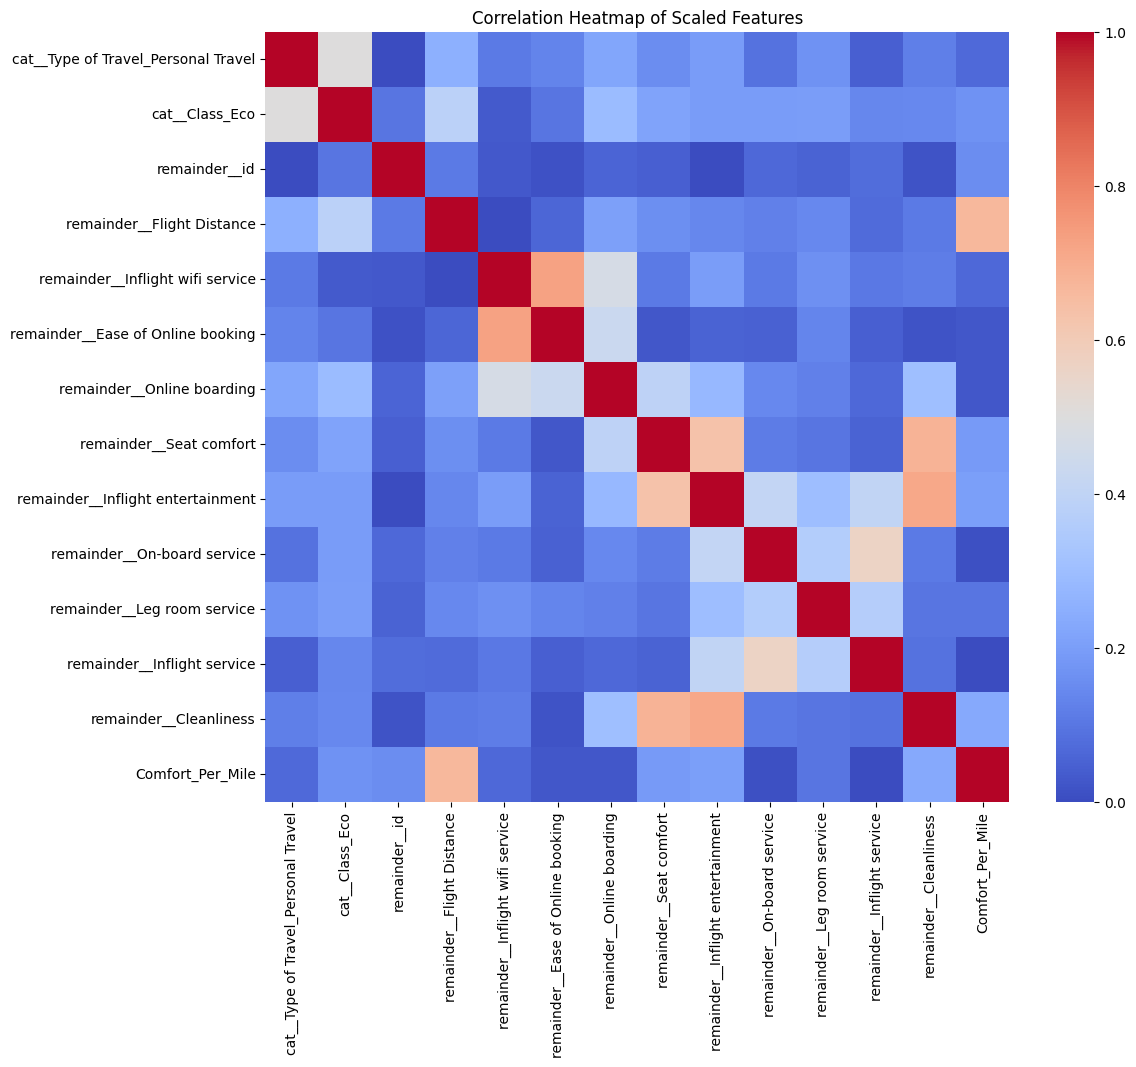

File saved successfully: /content/scaled_features.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import os
from google.colab import files

print(f"Current working directory: {os.getcwd()}")

try:
    df = pd.read_csv('/content/selected_features.csv')
    print("Dataset loaded successfully.")
    print(f"Loaded DataFrame shape: {df.shape}")
    print(f"Columns in DataFrame: {df.columns.tolist()}")
except FileNotFoundError:
    print("Error: '/content/selected_features.csv' not found. Please upload it to /content.")
    print("Use the following code to upload:")
    print("from google.colab import files\nuploaded = files.upload()")
    raise
except pd.errors.ParserError:
    print("Error: Issue parsing 'selected_features.csv'. Check file format or encoding.")
    raise
except Exception as e:
    print(f"Error loading dataset: {e}")
    raise

try:
    if 'remainder__satisfaction_encoded' in df.columns:
        X_selected_df = df.drop('remainder__satisfaction_encoded', axis=1)
        y = df['remainder__satisfaction_encoded']
        print("Target variable 'remainder__satisfaction_encoded' separated.")

        try:
            y.to_csv('/content/target.csv', index=False)
            print("Target saved as: /content/target.csv")
            files.download('/content/target.csv')
        except Exception as e:
            print(f"Error saving target.csv: {e}")
            raise
    else:
        X_selected_df = df
        print("Warning: 'remainder__satisfaction_encoded' not found. Proceeding with all columns as features.")
except KeyError as e:
    print(f"Error accessing columns: {e}")
    raise

print(f"Feature DataFrame shape: {X_selected_df.shape}")
print(f"Feature columns: {X_selected_df.columns.tolist()}")

print("\nSummary Statistics of Selected Features:")
print(X_selected_df.describe())

print("\nMissing Values in Selected Features:")
print(X_selected_df.isna().sum())

plt.figure(figsize=(12, 10))
corr_matrix = X_selected_df.corr().abs()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=0, vmax=1)
plt.title('Correlation Heatmap of Selected Features')
plt.show()

X_selected_df.hist(figsize=(12, 10), bins=20)
plt.suptitle('Histograms of Selected Features')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(data=X_selected_df, orient='h')
plt.title('Boxplots of Selected Features')
plt.show()

scaler = StandardScaler()

try:
    X_scaled = scaler.fit_transform(X_selected_df)
    print("Scaling applied successfully.")
except ValueError as e:
    print(f"Error during scaling: {e}")
    raise

X_scaled_df = pd.DataFrame(X_scaled, columns=X_selected_df.columns)

print("\nSummary Statistics After Scaling:")
print(X_scaled_df.describe())

X_scaled_df.hist(figsize=(12, 10), bins=20)
plt.suptitle('Histograms of Scaled Features')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(data=X_scaled_df, orient='h')
plt.title('Boxplots of Scaled Features')
plt.show()

plt.figure(figsize=(12, 10))
scaled_corr_matrix = X_scaled_df.corr().abs()
sns.heatmap(scaled_corr_matrix, annot=False, cmap='coolwarm', vmin=0, vmax=1)
plt.title('Correlation Heatmap of Scaled Features')
plt.show()

try:
    output_file = '/content/scaled_features.csv'
    X_scaled_df.to_csv(output_file, index=False)
    if os.path.exists(output_file):
        print(f"File saved successfully: {os.path.abspath(output_file)}")
        print("Downloading scaled_features.csv...")
        files.download(output_file)
    else:
        print("Error: File was not saved. Check permissions or directory.")
except PermissionError:
    print("Error: Permission denied when saving 'scaled_features.csv'.")
    raise
except Exception as e:
    print(f"Error saving or downloading file: {e}")
    raise